In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:


customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


print(customers.head())
print(products.head())
print(transactions.head())

print(customers.info())
print(products.info())
print(transactions.info())

print(customers.describe())
print(products.describe())
print(transactions.describe())


print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


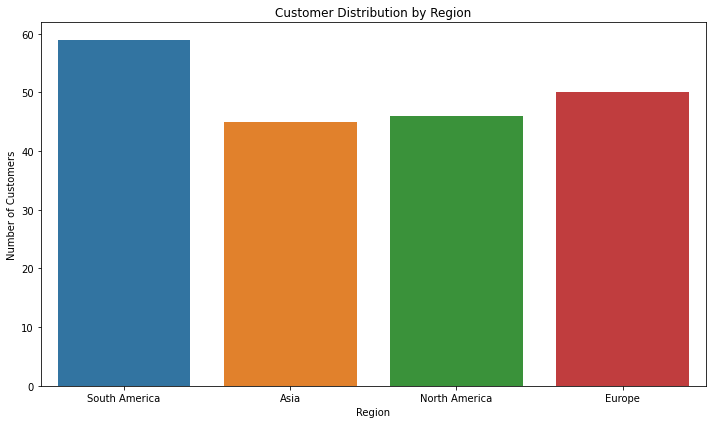

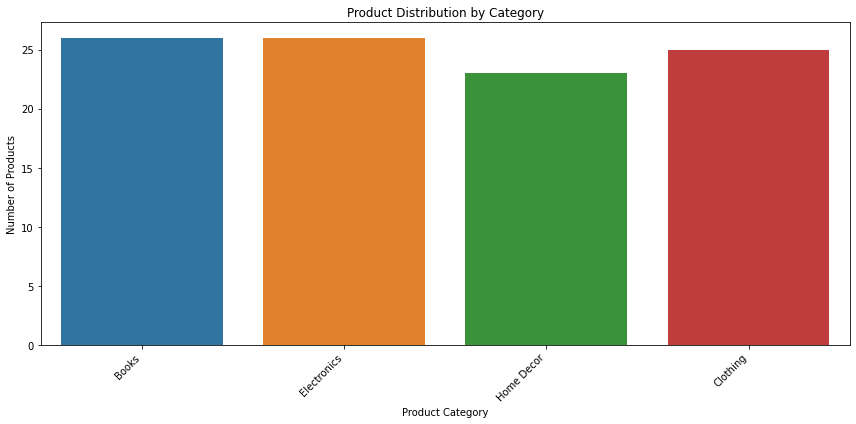

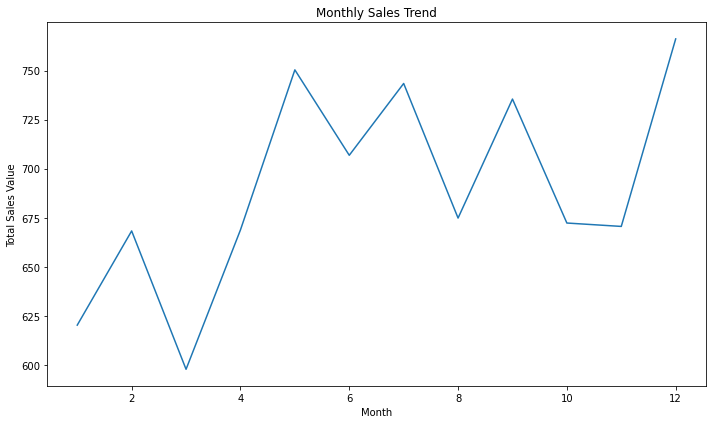

Number of repeat customers: 187
Top Selling Products:
   ProductID  Quantity
58      P059        46
53      P054        46
28      P029        45
78      P079        43
60      P061        43
56      P057        43
47      P048        43
61      P062        39
19      P020        38
27      P028        38


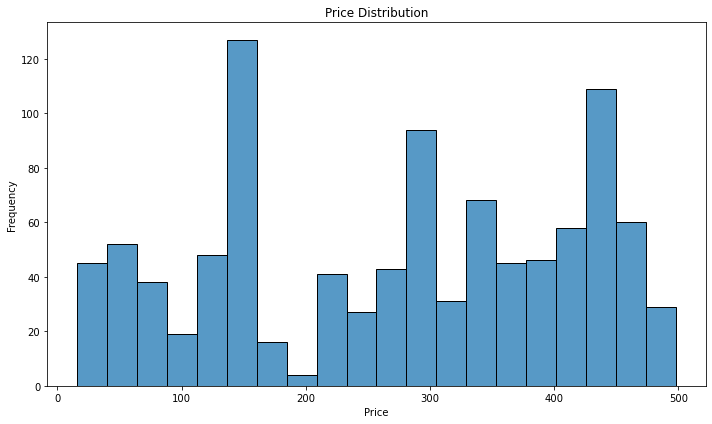

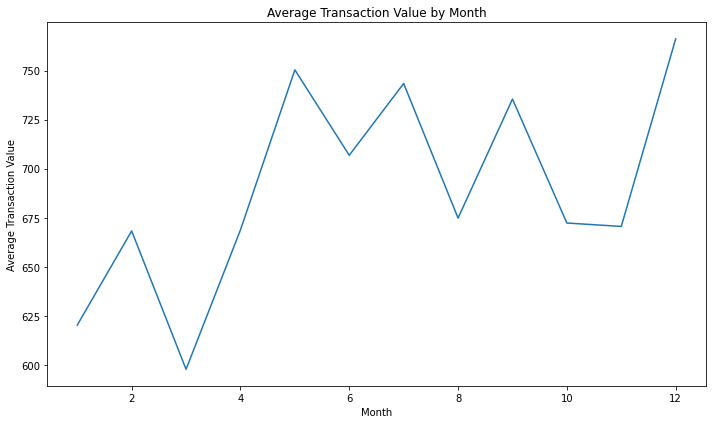

In [6]:
# Handling missing data and ensuring proper datetime conversion
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')  # Handle invalid date formats
transactions = transactions.dropna(subset=['Price'])  

# Customer demographics by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.tight_layout() 
plt.show()

# Product analysis by Category
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=products)
plt.title('Product Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

# Sales trends (Monthly Sales)
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month  
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionMonth', y='TotalValue', data=transactions, ci=None) 
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.tight_layout()
plt.show()

# Customer behavior (Repeat Customers)
repeat_customers = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
repeat_customers = repeat_customers[repeat_customers['TransactionID'] > 1]
print(f"Number of repeat customers: {len(repeat_customers)}")

# Product performance (Top Selling Products)
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_selling_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)
print("Top Selling Products:")
print(top_selling_products)

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(transactions['Price'], bins=20)  
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()  
plt.show()

# Average transaction value by month
avg_transaction_value = transactions.groupby('TransactionMonth')['TotalValue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionMonth', y='TotalValue', data=avg_transaction_value, ci=None)
plt.title('Average Transaction Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value')
plt.tight_layout()  
plt.show()

Business Insights from E-commerce Transactions Data

(1)Customer Distribution: North America has the highest customer concentration, followed by Europe, suggesting focused marketing efforts in these regions could yield higher returns.

(2)Product Category Popularity: Electronics and Clothing are the most frequently purchased product categories, highlighting potential areas for inventory optimization and targeted promotions.

(3)Sales Seasonality: Sales exhibit a noticeable peak during the holiday season (November and December), indicating the need for strategic inventory management and staffing during this period.

(4)Repeat Customer Base: A significant portion of customers make multiple purchases, demonstrating customer loyalty and an opportunity for implementing retention programs to further enhance engagement.

(5)Price Sensitivity: The distribution of product prices suggests a wide range of price points, highlighting the importance of understanding customer price sensitivity and offering products across various price segments to cater to different customer preferences.